# Sentiment Analysis and Zero-Shot Classification

In [4]:
# conda install -c conda-forge transformers

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ferratan/opt/anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39h6e9494a_1         969 KB  conda-forge
    huggingface_hub-0.10.1     |     pyhd8ed1ab_0         114 KB  conda-forge
    ninja-1.10.2               |       hecd8cb5_5           9 KB
    ninja-base-1.10.2          |       haf03e11_5         118 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    pytorch-1.10.2             |cpu_py39h903acac_0        53.9 MB
    sacremoses-0.0.53          |     pyhd8ed1ab_0         427 KB  conda-forge
    tokenizers-0.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/Users/ferratan/Downloads/ExpertGardener.csv', index_col = [0])

# Sentiment Analysis

In [3]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

[{'label': 'Negative', 'score': 0.79079270362854}]

In [5]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Zero Shot Classificaiton

In [6]:
import transformers
from transformers import pipeline

In [7]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [8]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': 'it did burn my grass quite a bit. this formula is not consistent, I used 2 bags and one of the bags did burn my lawn while the other worked just fine. i did follow all the instructions on the label. the only pro is its cheap.',
 'labels': ['faulty',
  'affordability',
  'cheap',
  'defective',
  'cost',
  'complaints',
  'functionality',
  'delivery',
  'effective',
  'satisfaction',
  'quality',
  'efficient',
  'ease of use',
  'expensive'],
 'scores': [0.99429851770401,
  0.9918051958084106,
  0.9908004403114319,
  0.9846618175506592,
  0.9736759662628174,
  0.7620783448219299,
  0.2330140769481659,
  0.06486840546131134,
  0.03194758668541908,
  0.025930991396307945,
  0.00441941199824214,
  0.0022613159380853176,
  0.0016619866946712136,
  0.001078824046999216]}

In [9]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': 'Delighted to have it germinate in our very shaded yards,4,200 ft elevation. Area planted last Fall wintered over in the snow and looked very nice this Spring, so we bought a second bag.',
 'labels': ['effective',
  'quality',
  'satisfaction',
  'efficient',
  'functionality',
  'cost',
  'ease of use',
  'affordability',
  'cheap',
  'delivery',
  'expensive',
  'faulty',
  'defective',
  'complaints'],
 'scores': [0.9880972504615784,
  0.975459098815918,
  0.9638426899909973,
  0.915681004524231,
  0.41395077109336853,
  0.2996121346950531,
  0.28265148401260376,
  0.16754747927188873,
  0.13265830278396606,
  0.06653182208538055,
  0.0572749488055706,
  0.0076195490546524525,
  0.0013537924969568849,
  0.0005482065607793629]}

In [10]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': 'I found Expert All-Purpose plant food to have a nice consistency of the various graduals. I like that I can use the same product for my flowers as I do my fruits and vegetables. This review was collected as part of a promotion, and the opinions are my own.',
 'labels': ['ease of use',
  'effective',
  'efficient',
  'quality',
  'functionality',
  'satisfaction',
  'cost',
  'affordability',
  'cheap',
  'delivery',
  'expensive',
  'faulty',
  'defective',
  'complaints'],
 'scores': [0.9940300583839417,
  0.9855122566223145,
  0.9823166131973267,
  0.9713661670684814,
  0.85272616147995,
  0.7544671297073364,
  0.23447763919830322,
  0.17408035695552826,
  0.13615822792053223,
  0.04971696436405182,
  0.019843466579914093,
  0.019330238923430443,
  0.006459509022533894,
  0.004106045234948397]}

In [11]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective'], 
    multi_label = True
)
res

{'sequence': 'This potting soil seems to be a nice mix with nutrients for my plants. this bag will fill a 12 inch pot nicely. thos miz contains compost, forest products, sphagnum peat moss and pearlite. i like the texture and weight of the mix. I cant wait to see how large and beautiful my plant will grow using this soil.I received product reimbursement in exchange for my honest review',
 'labels': ['effective',
  'quality',
  'efficient',
  'cost',
  'satisfaction',
  'delivery',
  'functionality',
  'ease of use',
  'affordability',
  'cheap',
  'complaints',
  'faulty',
  'expensive',
  'defective'],
 'scores': [0.9778822064399719,
  0.9746807813644409,
  0.8209338188171387,
  0.6819387674331665,
  0.653386652469635,
  0.6415681838989258,
  0.5980527997016907,
  0.4061949551105499,
  0.23072226345539093,
  0.08910791575908661,
  0.01089621614664793,
  0.003031096188351512,
  0.001594751374796033,
  0.00044307735515758395]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [12]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [13]:
# insert the labels you identified from above section
type = ['affordability', 'quality', 'complaints', 'satisfaction', 'delivery', 'ease of use', 'cost', 'efficient', 'functionality', 'cheap', 'expensive', 'effective', 'faulty', 'defective']

In [14]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [15]:
# create a "max" column for metric purposes
df['max'] = df[['affordability_m', 'quality_m', 'complaints_m', 'satisfaction_m', 'delivery_m', 'ease of use_m', 'cost_m', 'efficient_m', 'functionality_m', 'cheap_m', 'expensive_m', 'effective_m', 'faulty_m', 'defective_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,sentiment,affordability_m,quality_m,complaints_m,satisfaction_m,delivery_m,ease of use_m,cost_m,efficient_m,functionality_m,cheap_m,expensive_m,effective_m,faulty_m,defective_m,max
11128,Garden,72720,Expert Gardener Citrus Plant Food Fertilizer 6...,https://www.walmart.com//ip/Expert-Gardener-Ci...,Walmart,ExpertGardener,587336041,870632402,Yes,2022-01-29T00:00:00,2022,1,4,NaN,this is a great fertilizer. I used it on my Fl...,organic reviews,9.26,5,0,0,0,No,this is a great fertilizer. i used it on my fl...,2022-01-29,Positive,0.203181,0.976304,0.001477,0.477199,0.156387,0.169117,0.631661,0.925835,0.410857,0.114190,0.025476,0.997971,0.000326,0.000114,0.997971
8005,Garden,67877,Expert Gardener Weed & Feed Lawn Fertilizer & ...,https://www.walmart.com//ip/Expert-Gardener-We...,Walmart,ExpertGardener,935904830,603561302,No,2021-08-30T00:00:00,2021,8,35,inconsistent and does burn the lawn,it did burn my grass quite a bit. this formula...,organic reviews,38.74,2,0,0,0,No,it did burn my grass quite a bit. this formula...,2021-08-30,Negative,0.991699,0.004573,0.738085,0.026369,0.073312,0.001626,0.973189,0.002565,0.239017,0.990821,0.001119,0.035779,0.994203,0.983910,0.994203
8255,Garden,68127,Expert Gardener Sun & Shade Grass Seed Norther...,https://www.walmart.com//ip/Expert-Gardener-Su...,Walmart,ExpertGardener,108037091,660854953,No,2021-07-07T00:00:00,2021,7,27,Good Sun and shade grass mix,Delighted to have it germinate in our very sha...,organic reviews,39.92,5,0,0,0,No,delighted to have it germinate in our very sha...,2021-07-07,Positive,0.163184,0.975453,0.000577,0.959377,0.084828,0.262179,0.313958,0.884429,0.382133,0.176899,0.105138,0.985876,0.008299,0.002043,0.985876


In [16]:
#assign the max to its aligned type
align_list=[]
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      align_list.append(t)
      
df['align_type']=align_list

In [17]:
import seaborn as sns

In [18]:
# Create Pivot table for the Heatmap
table = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc=np.mean,fill_value=0)
table

align_type,affordability,cheap,complaints,cost,defective,delivery,ease of use,effective,efficient,expensive,faulty,functionality,quality,satisfaction
sentiment,,,,,,,,,,,,,,
Negative,0.000000,0.995938,0.968516,0.735759,0.970160,0.945446,0.824368,0.876464,0.000000,0.996261,0.959886,0.000000,0.000000,0.000000
Neutral,0.994104,0.993398,0.000000,0.878563,0.959458,0.959316,0.000000,0.969948,0.991640,0.992426,0.853098,0.000000,0.000000,0.000000
Positive,0.989586,0.992978,0.000000,0.961467,0.000000,0.992075,0.996191,0.992179,0.927096,0.000000,0.993093,0.830062,0.979215,0.997693


<Figure size 864x360 with 0 Axes>

[Text(0.5, 17.5, ''), Text(80.5, 0.5, '')]

[Text(0.5, -49.875, ''), Text(80.5, 0.5, '')]

[Text(0.5, -49.875, ''), Text(80.5, 0.5, '')]

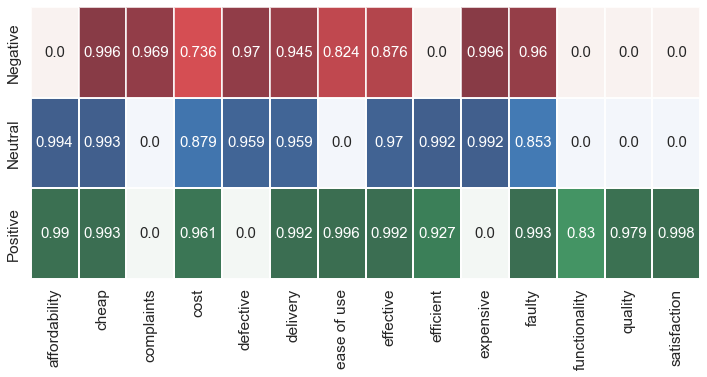

In [19]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Metric and Sanity Check

[Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0

0.9875

['it did burn my grass quite a bit. this formula is not consistent, i used 2 bags and one of the bags did burn my lawn while the other worked just fine. i did follow all the instructions on the label. the only pro is its cheap.']

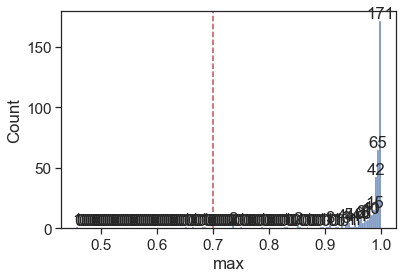

In [20]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [21]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 18596 to 10267
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   segment               37 non-null     object 
 1   review_id             37 non-null     int64  
 2   product_name          37 non-null     object 
 3   producturl            37 non-null     object 
 4   retailer              37 non-null     object 
 5   brand                 37 non-null     object 
 6   retailer_product_id   37 non-null     int64  
 7   base_id               37 non-null     int64  
 8   variants_flag         37 non-null     object 
 9   review_creation_date  37 non-null     object 
 10  year                  37 non-null     int64  
 11  month                 37 non-null     int64  
 12  week                  37 non-null     int64  
 13  review_title          27 non-null     object 
 14  review_text           37 non-null     object 
 15  review_type       

In [22]:
len(df_uncat)

37

In [24]:
df_uncat.to_csv('unlabeled_data_expertgardener.csv')